In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import platform 
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'C:/Windows/Fonts/NGULIM.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/NanumGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
%matplotlib inline

## labeled 데이터 불러오기

In [7]:
df = pd.read_csv('data/PNlabeled_review.csv', encoding='utf-8')

In [8]:
df

,review,is_pos
0,"지난 주말, 부모님과 함께 널찍한 노마루가 있는 산노을 방에서 묵었어요. 꽃피는 봄...",1
1,월정교와도 가깝고 방도 넘 깨끗했습니다. 사장님도 너무 친절하시고 좋았어요. 특히 ...,1
2,"아주 늦은시간 도착했는데 프론트 친절하시고, 객실정비도 잘 되어있고 수건도 넉넉해...",1
3,가격대비 만족합니다호텔도 깨끗한 편이에요,1
4,깔끔하고 좋아요~^^,1
...,...,...
94633,차라리 옆에 휘슬락가세요 뷰 생각하고 일부러 슈페리어 잡았더니 방파제삼바리밖에안보이...,0
94634,호텔인척하는 모텔\n화장실들어가자마자 쉰내가 .. 욕조는 노랗게 때가 묻었고 사람머...,0
94635,다른건 호텔 평균이고. 6층 객실 와이파이 안잡힘,0
94636,마지막날숙소로 잡았는데 제일 별로였어요 \n층간소음에 욕실에 하수구냄새인지 뭔지 계...,0


In [9]:
print('전체 데이터의 갯수: {}'.format(len(df)))

전체 데이터의 갯수: 94638


## 리뷰 길이 시각화(히스토그램)

In [10]:
data_length = df['review'].apply(len)
data_length.head()

0    193
1    274
2    110
3     22
4     11
Name: review, dtype: int64

<ipython-input-11-722a1de314cd>:3: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of review')

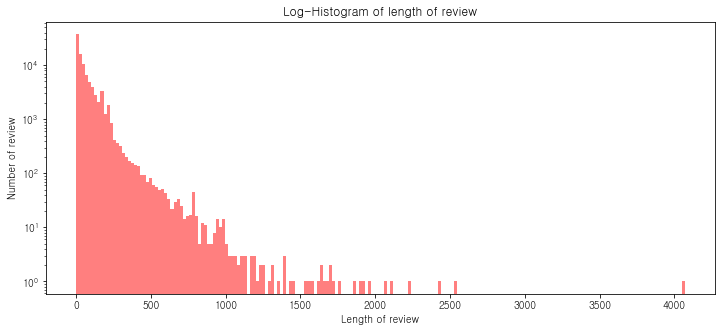

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(data_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

## 리뷰 길이 통계값 확인

In [12]:
print('리뷰 길이 최댓값: {}'.format(np.max(data_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(data_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(data_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(data_length)))
print('리뷰 길이 중간값: {}'.format(np.median(data_length)))
print('리뷰 길이 제 1사분위: {}'.format(np.percentile(data_length, 25)))
print('리뷰 길이 제 3사분위: {}'.format(np.percentile(data_length, 75)))

리뷰 길이 최댓값: 4070
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 66.28
리뷰 길이 표준편차: 95.41
리뷰 길이 중간값: 32.0
리뷰 길이 제 1사분위: 13.0
리뷰 길이 제 3사분위: 85.0


## 리뷰 박스 플롯 시각화

{'whiskers': [<matplotlib.lines.Line2D at 0x1b30bfa0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1b30c000250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b30bfa07f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b30c000910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b30c000fd0>],
 'means': [<matplotlib.lines.Line2D at 0x1b30c000c70>]}

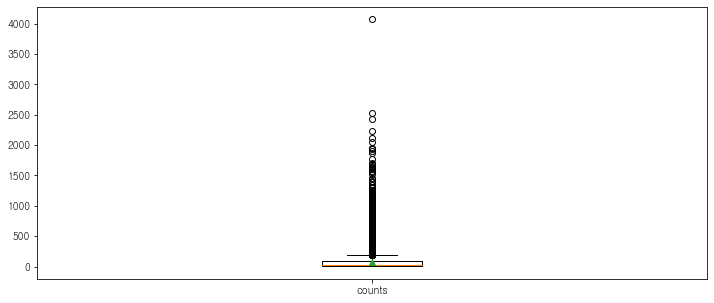

In [13]:
plt.figure(figsize=(12, 5))
plt.boxplot(data_length, labels=['counts'], showmeans=True)

## 리뷰 워드클라우드

(-0.5, 799.5, 599.5, -0.5)

<Figure size 1440x1080 with 0 Axes>

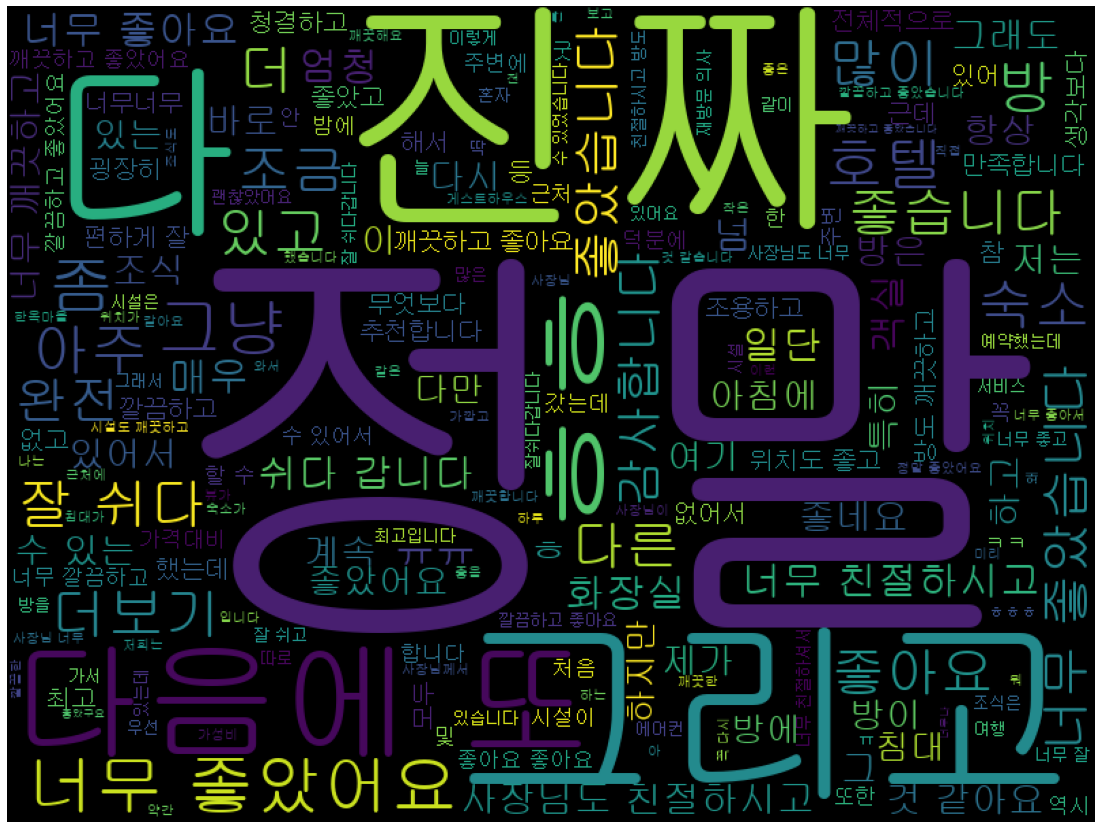

In [14]:
cloud = WordCloud(font_path=font_path, width=800, height=600).generate(" ".join(df['review']))
plt.figure(figsize=(20, 15))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## 라벨 분포 시각화

C:\Users\harry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_pos', ylabel='count'>

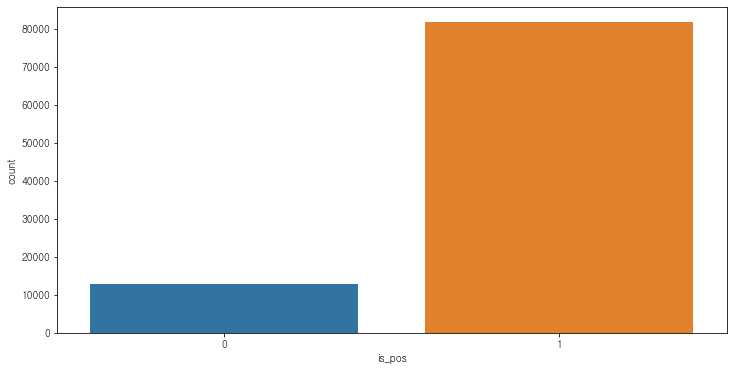

In [15]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12, 6)
sns.countplot(df['is_pos'])

In [16]:
print('============== is_pos 분포 ==============')
print("{}".format(df['is_pos'].value_counts()))

============== is_pos 분포 ==============
1    81711
0    12927
Name: is_pos, dtype: int64


## 리뷰당 단어 갯수 시각화

In [17]:
data_word_counts = df['review'].apply(lambda x:len(x.split(' ')))

<ipython-input-18-40dbd499e612>:4: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

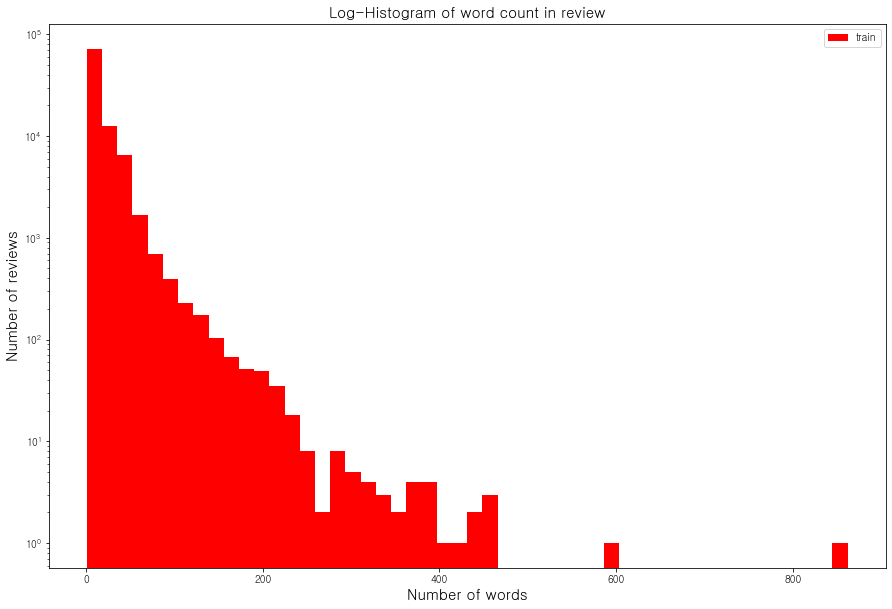

In [18]:
plt.figure(figsize=(15, 10))
plt.hist(data_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

## 리뷰당 단어 갯수 통계값 확인

In [19]:
print('리뷰 단어 갯수 최댓값: {}'.format(np.max(data_word_counts)))
print('리뷰 단어 갯수 최솟값: {}'.format(np.min(data_word_counts)))
print('리뷰 단어 갯수 평균값: {:.2f}'.format(np.mean(data_word_counts)))
print('리뷰 단어 갯수 표준편차: {:.2f}'.format(np.std(data_word_counts)))
print('리뷰 단어 갯수 중간값: {}'.format(np.median(data_word_counts)))
print('리뷰 단어 갯수 제 1사분위: {}'.format(np.percentile(data_word_counts, 25)))
print('리뷰 단어 갯수 제 3사분위: {}'.format(np.percentile(data_word_counts, 75)))

리뷰 단어 갯수 최댓값: 862
리뷰 단어 갯수 최솟값: 1
리뷰 단어 갯수 평균값: 14.22
리뷰 단어 갯수 표준편차: 21.00
리뷰 단어 갯수 중간값: 7.0
리뷰 단어 갯수 제 1사분위: 3.0
리뷰 단어 갯수 제 3사분위: 18.0


## 데이터 특수문자 유무 확인

In [20]:
qmarks = np.mean(df['review'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(df['review'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문: 5.23%
마침표가 있는 질문: 33.98%
